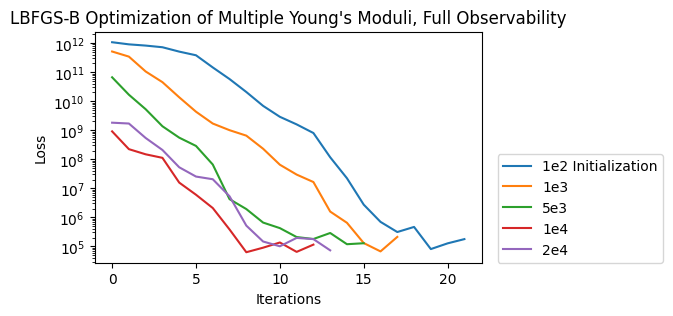

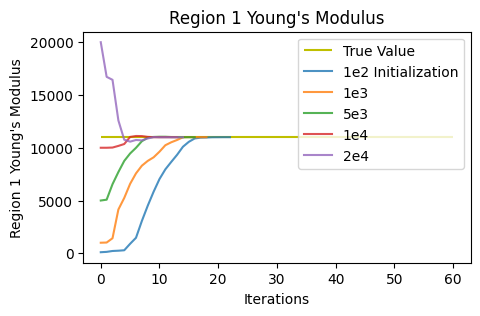

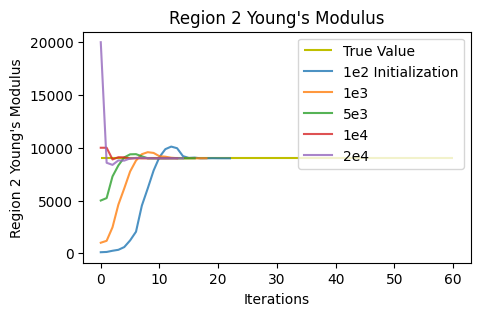

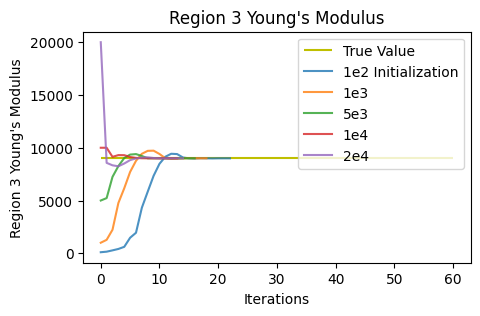

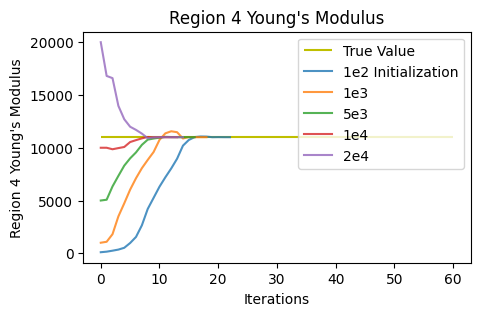

In [13]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_1e2.json',
    'result_1e3.json',
    'result_05e4.json',
    'result_e_opt.json',
    'result_2e4.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1e16, 1, 1]
labels = ['1e2 Initialization',
          '1e3', 
          '5e3',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli, Full Observability")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    plt.legend()
    plt.show()


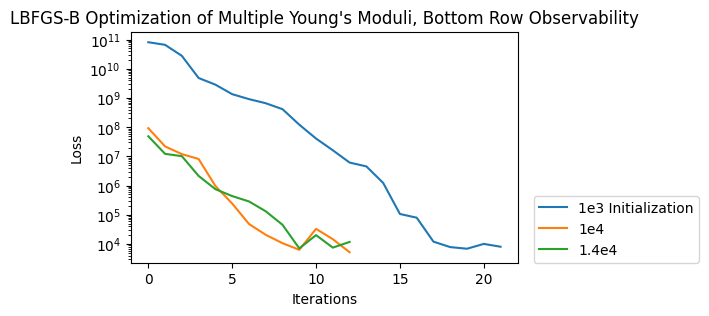

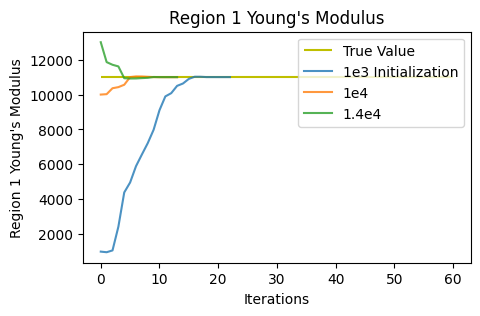

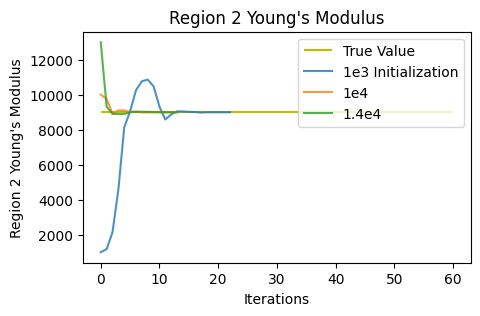

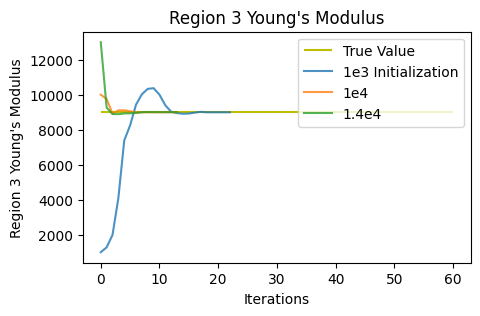

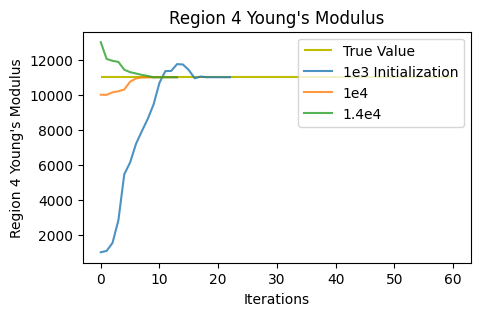

In [15]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_1e3_row.json',
    'result_1e4_row.json',
    'result_13e4_row.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1, 1, 1]
labels = ['1e3 Initialization',
          '1e4', 
          '1.4e4',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli, Bottom Row Observability")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    plt.legend()
    plt.show()
